In [4]:
<h2><b>Bayesian Problem #03: Small Businesses Accepting Digital Payments</b></h2>

SyntaxError: invalid syntax (2561592001.py, line 1)

A local study surveyed 600 sari-sari store owners and found that 295 of them accept payments through GCash or other e-wallets. We want to estimate the true acceptance rate of e-wallet payments among these stores using Bayesian inference. Additionally, we want to see how confident we can be about this estimate and calculate the probability that the acceptance rate is above 50%, which would indicate that digital payments are becoming common in this community.

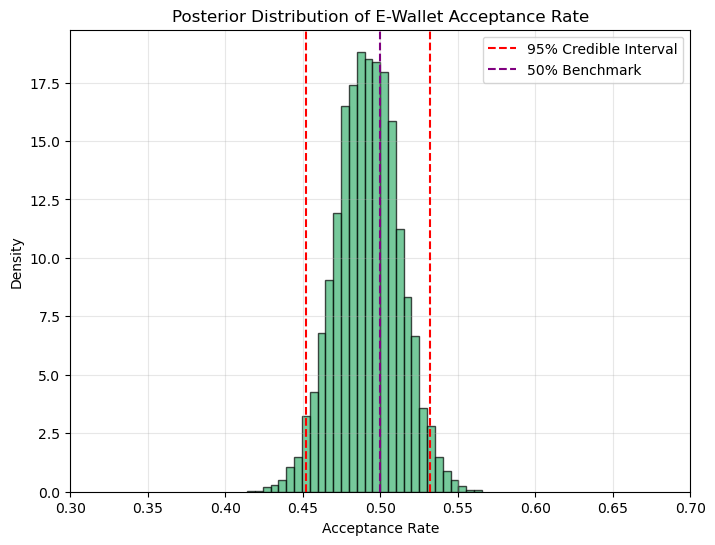

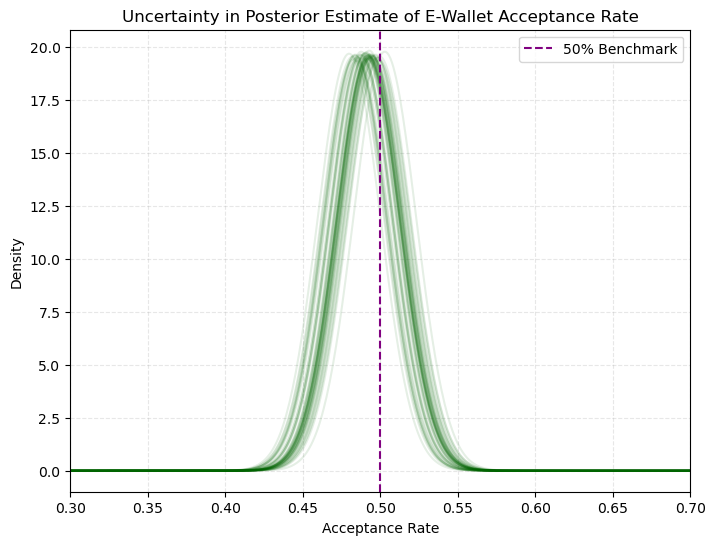


📱 E-Wallet Acceptance Rate Estimate (Bayesian Inference)
• Mean acceptance rate: 0.4917
• Mode acceptance rate: 0.4917
• 95% credible interval: (0.452, 0.532)
• Probability acceptance rate > 50%: 0.3504

📌 CONCLUSION:
The estimated acceptance rate of e-wallet payments among sari-sari store owners is approximately 49.2%. However, there is only a 35.0% probability that the true acceptance rate exceeds the 50% threshold. This suggests that fewer than half of the stores are currently adopting digital payment methods, and broader usage may still be emerging.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

total_stores = 600
accepted_ewallet = 295  # updated count

prior_alpha = 1
prior_beta = 1

posterior_alpha = prior_alpha + accepted_ewallet
posterior_beta = prior_beta + (total_stores - accepted_ewallet)

posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# First graph: posterior distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.50, color='purple', linestyle='--', label='50% Benchmark')
plt.title('Posterior Distribution of E-Wallet Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.3, 0.7)
plt.grid(alpha=0.3)
plt.show()

# Second graph: multiple Beta pdf curves to show uncertainty
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))

for _ in range(50):
    alpha_sample = np.random.normal(posterior_alpha, 5)
    beta_sample = np.random.normal(posterior_beta, 5)
    
    alpha_sample = max(alpha_sample, 0.1)
    beta_sample = max(beta_sample, 0.1)
    
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='darkgreen', alpha=0.1)

plt.axvline(0.50, color='purple', linestyle='--', label='50% Benchmark')
plt.title('Uncertainty in Posterior Estimate of E-Wallet Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.3, 0.7)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

mean_rate = posterior_alpha / (posterior_alpha + posterior_beta)
mode_rate = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_50 = np.mean(posterior_samples > 0.50)

print("\n\033[1m📱 E-Wallet Acceptance Rate Estimate (Bayesian Inference)\033[0m")
print(f"• Mean acceptance rate: \033[94m{mean_rate:.4f}\033[0m")
print(f"• Mode acceptance rate: \033[94m{mode_rate:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability acceptance rate > 50%: \033[92m{prob_above_50:.4f}\033[0m")

print("\n\033[1m📌 CONCLUSION:\033[0m")
print(f"\033[1mThe estimated acceptance rate of e-wallet payments among sari-sari store owners is approximately {mean_rate*100:.1f}%. "
      f"However, there is only a {prob_above_50*100:.1f}% probability that the true acceptance rate exceeds the 50% threshold. "
      f"This suggests that fewer than half of the stores are currently adopting digital payment methods, and broader usage may still be emerging.\033[0m")
